## Project Submission

* Student name: LENNY MUBEA
* Student pace: full time
* Scheduled project review date/time: 2/09/2024
* Instructor name: ANTONNY MUIKO
* Blog post URL: https://github.com/L3-nny/Phase-3-Project


# 1. Business Understanding
 A bank has provided data from their marketing campaign aimed at encouraging customers to opt into their insurance coverage. The goal of this project is to analyze the data and present findings to a non-technical team, enabling them to make data-driven decisions to improve the effectiveness of their insurance marketing strategies.

Questions to explore:
1. Which occupations have the highest and lowest conversion rate?
2. How does age impact conversion rate?
3. What is the impact of the outcome of previous campaigns on current conversion rates?
4. Does the frequency of calls to a customer correlate with their likelihood to convert?

# 2. Data Understanding

In this analysis, we'll be working with a dataset sourced from Kaggle, which contains information about bank customers and their likelihood of converting to an insurance service offered by the bank. The dataset is composed of several key features that describe customer demographics, interaction history, and the outcome of previous marketing campaigns.

Key Features in the Dataset:

1.Occupation: The type of job the customer holds.

2.Age: The customer's age.

3.Education Level: The highest level of education the customer has attained.

4.Marital Status: The marital status of the customer (e.g., married, single, divorced).

5.Communication Channel: The medium through which the customer was contacted (e.g., mobile, landline).

6.Call Month: The month in which the customer was contacted.

7.Call Duration: The length of time the customer spent on the call.

8.Call Frequency: The number of times the customer was contacted during the campaign.

9.Previous Campaign Outcome: The result of previous marketing campaigns (i.e successful or failed).

10.Conversion Status: The target variable indicating whether the customer converted to the insurance service or not.

We'll begin our analysis with a comprehensive investigation of the data using the pandas library.

In [1]:
# Import the necessary libraries
import pandas as pd

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv("E:\SCHOOL\phase-3\Assignments\Phase 3 Project\dataset.csv")
df

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted
...,...,...,...,...,...,...,...,...,...,...,...
45206,administrative_staff,50,high_school,divorced,mobile,May,6,114,1,unsuccessful,not_converted
45207,independent_worker,49,college,married,unidentified,May,13,98,1,unidentified,not_converted
45208,executive,30,college,married,mobile,June,12,175,2,other_outcome,not_converted
45209,retired_worker,59,elementary_school,married,landline,July,15,41,5,unidentified,not_converted


In [3]:
# Print the column names in the dataframe
df.columns

Index(['occupation', 'age', 'education_level', 'marital_status',
       'communication_channel', 'call_month', 'call_day', 'call_duration',
       'call_frequency', 'previous_campaign_outcome', 'conversion_status'],
      dtype='object')

In [4]:
# Print the dimensions of the dataframe
df.shape

(45211, 11)

In [5]:
# Brief summary of the numeric columns in the dataframe
df.describe()

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [6]:
# Check for any missing values
df.isnull().sum()

occupation                   0
age                          0
education_level              0
marital_status               0
communication_channel        0
call_month                   0
call_day                     0
call_duration                0
call_frequency               0
previous_campaign_outcome    0
conversion_status            0
dtype: int64

# 1. 'Which occupations have the highest and lowest conversion rate?' 

To answer this, we'll have to group the dataframe by the occupation column, then find the average count of the converted customers and those that were not converted.

In [7]:
df.head(8)

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted
5,manual_worker,39,elementary_school,married,unidentified,June,6,158,2,unidentified,not_converted
6,business_owner,42,college,divorced,mobile,July,10,563,1,unidentified,not_converted
7,retired_worker,68,college,married,mobile,August,4,651,1,successful,converted


In [8]:
df[df['conversion_status'] == 'converted']

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
7,retired_worker,68,college,married,mobile,August,4,651,1,successful,converted
8,student,22,college,single,mobile,November,30,260,5,successful,converted
12,executive,48,college,single,mobile,August,25,961,4,unidentified,converted
63,technical_specialist,32,college,single,mobile,June,17,544,1,unidentified,converted
74,executive,32,college,single,mobile,September,8,519,1,unsuccessful,converted
...,...,...,...,...,...,...,...,...,...,...,...
45184,retired_worker,59,elementary_school,married,mobile,June,5,493,2,unidentified,converted
45193,administrative_staff,52,high_school,single,mobile,November,3,412,1,unidentified,converted
45197,retired_worker,72,elementary_school,married,landline,March,23,255,1,successful,converted
45204,technical_specialist,32,high_school,single,mobile,January,29,750,1,unidentified,converted


In [9]:
# Combine the columns based on the occupation and find the mean of the converted
conversion_by_occupation = df.groupby('occupation')['conversion_status'].apply(lambda x: (x == 'converted').mean()).sort_values(ascending=False)
conversion_by_occupation

occupation
student                 0.286780
retired_worker          0.227915
jobless                 0.155027
executive               0.137556
administrative_staff    0.122027
independent_worker      0.118429
unidentified            0.118056
technical_specialist    0.110570
service_worker          0.088830
domestic_worker         0.087903
business_owner          0.082717
manual_worker           0.072750
Name: conversion_status, dtype: float64

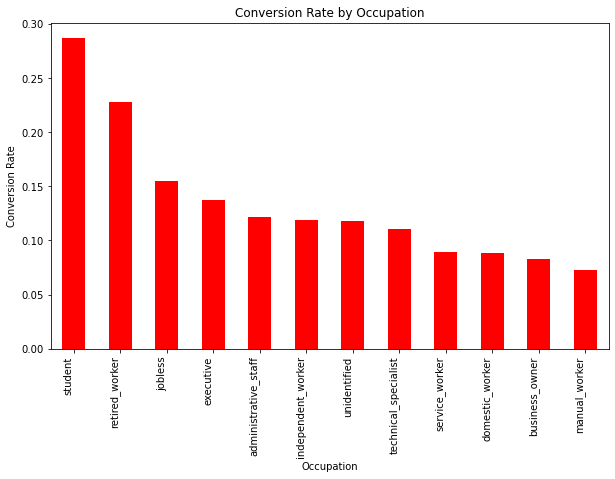

In [10]:
# Import the relevant library
import matplotlib.pyplot as plt

# Plot the bar graph
plt.figure(figsize=(10, 6))
conversion_by_occupation.plot(kind='bar', color='red')
plt.title('Conversion Rate by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=90, ha='right')
plt.show()

From the plot above, it is clear that the occupations with the most people converted is 'Student', 'Retired Worker' and 'Jobless'.

On the other hand, the occupations with the least people enrolling for the insurance offered are 'Manual Worker', 'Business Owner' and 'Domestic Worker'.


## 2. 'How does age impact conversion rate?'

For this question, we'll have to categorize the different ages into age brackets since they're too widespread to work on each individually.

We'll then find the conversion rate for each age bracket to find out the age bracket with the highest and lowest likelihood of being converted.

In [11]:
# Combine the columns based on the age and find the mean of the converted
conversion_by_age = df.groupby('age')['conversion_status'].apply(lambda x : (x=='converted').mean()).sort_values(ascending=False)
conversion_by_age

age
93    1.000000
92    1.000000
90    1.000000
85    0.800000
87    0.750000
        ...   
44    0.081866
50    0.076677
94    0.000000
89    0.000000
88    0.000000
Name: conversion_status, Length: 77, dtype: float64

Since age is continous, we'll have to categorize it into different groups with an age interval of 10.

In [12]:
# Find the minimum age
min_age = df['age'].min()
print(min_age)

max_age = df['age'].max()
print(max_age)


18
95


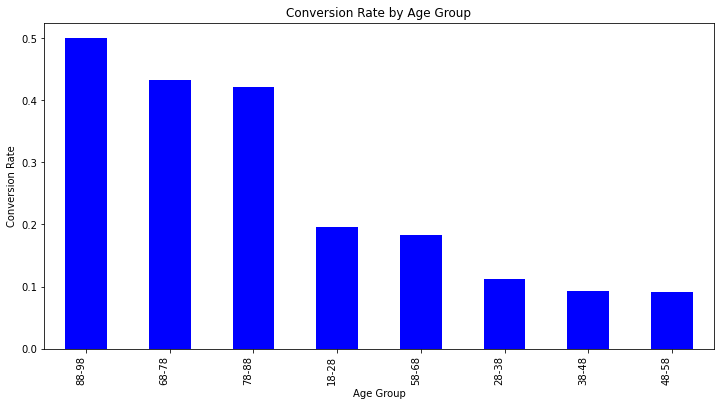

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age bins and labels, starting from 18
bins = list(range(18, 99, 10))  # Adjusted bins to start from 10 (since the minimum age is 18)
labels = [f'{i}-{i+10}' for i in bins[:-1]]  # Create labels for the bins

# Create a copy of the dataframe
df_copy = df.copy()
# Categorize ages into bins
df_copy['age_group'] = pd.cut(df_copy['age'], bins=bins, labels=labels, right=False)

# Calculate conversion rate by age group
conversion_by_age_group = df_copy.groupby('age_group')['conversion_status'].apply(lambda x: (x == 'converted').mean()).sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 6))
conversion_by_age_group.plot(kind='bar', color='blue')
plt.title('Conversion Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=90, ha='right')
plt.show()


From the plot above, it is evident that the older age groups have a higher conversion rate. From about 68 years, the number of people subscribing to the insurance is high compared to the other age groups.

The age groups with the lowest conversion rate include: 28-58.

## 3. 'What is the impact of the outcome of previous campaigns on current conversion rates?'

We are going to check for the result of the previous campaign which could be 'successful', 'unsuccessful', 'unidentified' or 'other outcome'.


Then after fetching the current conversion status, we'll determine whether there is a relationship between the outcome of the previous campaign and the current conversion rates.

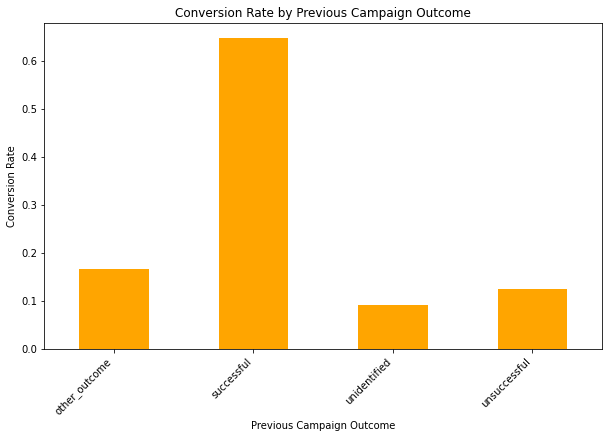

In [14]:
# Calculate conversion rate based on previous campaign outcome
conversion_by_previous_outcome = df.groupby('previous_campaign_outcome')['conversion_status'].apply(lambda x: (x == 'converted').mean())

# Plot the bar graph
plt.figure(figsize=(10, 6))
conversion_by_previous_outcome.plot(kind='bar', color='orange')
plt.title('Conversion Rate by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

From the bar graph, there is a higher conversion rate for people who had converted from the previous campaign.

## 4. 'Does the frequency of calls to a customer correlate with their likelihood to convert?'

To answer this, we check if there's a relationship between call frequency and sign-ups and then calculate the correlation to show the strength of the relationship.

In [15]:
# Create a copy of the dataframe
df_copy = df.copy()

# Ensure 'conversion_status' is encoded as binary (e.g., 0 for 'not_converted', 1 for 'converted')
df_copy['conversion_status_binary'] = df_copy['conversion_status'].apply(lambda x: 1 if x == 'converted' else 0)

# Calculate the correlation between call_frequency and conversion_status
correlation = df_copy[['call_frequency', 'conversion_status_binary']].corr().iloc[0, 1]

# Print the correlation
print(f"Correlation between call frequency and conversion likelihood: {correlation:.2f}")

Correlation between call frequency and conversion likelihood: -0.07


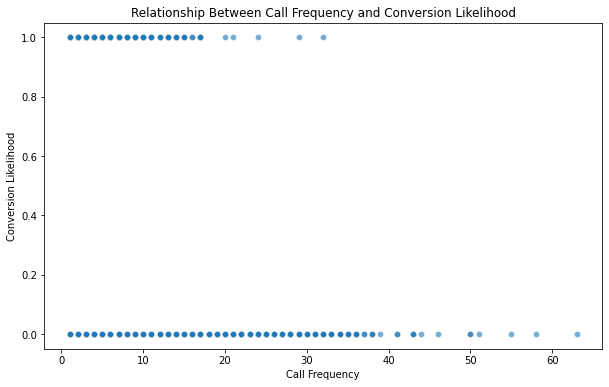

In [16]:
import seaborn as sns

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='call_frequency', y='conversion_status_binary', data=df_copy, alpha=0.6)
plt.title('Relationship Between Call Frequency and Conversion Likelihood')
plt.xlabel('Call Frequency')
plt.ylabel('Conversion Likelihood')
plt.show()

The correlation coefficient of -0.07 indicates a very weak negative correlation between frequency and the likelihood of conversion

# 3. Data Preparation

Now that we have answered our questions, we are going to predict the customers who are likely to enroll in the bank's insurance plans.

By analyzing customer data, the model will help identify key factors that influence a customer's decision to convert.

This will in turn allow the bank to focus its marketing efforts more effectively, targeting customers who are more likely to respond positively to the campaign, thereby increasing conversion rates and optimizing resources.

In [17]:
# Preview of the original dataframe
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [18]:
# Check the total values for each class in the target column
print("Raw Counts")
print(df['conversion_status'].value_counts())
print()
print("Percentages")
print(df["conversion_status"].value_counts(normalize=True))

Raw Counts
not_converted    39922
converted         5289
Name: conversion_status, dtype: int64

Percentages
not_converted    0.883015
converted        0.116985
Name: conversion_status, dtype: float64


Our dataset is heavily imbalanced because if we built a model that always predicted the conversion status as not converted, the model would be about 88% accurate.

We'll therefore use SMOTE to generate synthetic samples for the minority class and then train a model on the balanced dataset.

# 4. Modeling and Evaluation

To build our first baseline model, we'll have to encode the categorical variables first since logistic regression requires numerical inputs.

In [19]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


In [20]:
# Encode the categorical features
encoded_df = pd.get_dummies(df, drop_first=True)
encoded_df.head()

,age,call_day,call_duration,call_frequency,occupation_business_owner,occupation_domestic_worker,occupation_executive,occupation_independent_worker,occupation_jobless,occupation_manual_worker,...,call_month_June,call_month_March,call_month_May,call_month_November,call_month_October,call_month_September,previous_campaign_outcome_successful,previous_campaign_outcome_unidentified,previous_campaign_outcome_unsuccessful,conversion_status_not_converted
0,28,9,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,58,5,307,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,40,4,113,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,63,7,72,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,43,29,184,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [21]:
# Define the exogenous and endogenous variables
X = encoded_df.drop(columns='conversion_status_not_converted')
y = encoded_df['conversion_status_not_converted']

In [28]:
# Import the necessary library
from sklearn.metrics import accuracy_score, precision_score, recall_score ,roc_auc_score, roc_curve

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a baseline model
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)
y_pred_proba = baseline_model.predict_proba(X_test)[:, 1]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline)
recall = recall_score(y_test, y_pred_baseline)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")




Accuracy: 0.90
Precision: 0.91
Recall: 0.97
AUC-ROC: 0.89


e:\SCHOOL\anaconda3.1\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


These are the metrics for our baseline model, however, initially our dataframe was heavily imbalanced. Therefore, applying SMOTE to the dataset and using the oversampled data will help train our model better.

By balancing the dataset, SMOTE reduces the bias that the baseline model might develop towards the majority class(not converted). This will prevent the model from simply predicting the majority class most of the time.

In [34]:
# Import the required library
from sklearn.metrics import accuracy_score, precision_score, recall_score ,roc_auc_score, roc_curve

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train model on SMOTE-augmented data
smote_model = LogisticRegression(max_iter=1000)
smote_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = smote_model.predict(X_test)
y_pred_proba = smote_model.predict_proba(X_test)[:, 1]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")


Accuracy: 0.88
Precision: 0.93
Recall: 0.94
AUC-ROC: 0.86


e:\SCHOOL\anaconda3.1\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Although, there was a slight decrease in the recall, the SMOTE  model has a recall of 0.94 which is still quite high. This indicates that the model is still very good at identifying customers who will convert.

The SMOTE model also has a higher precision than the baseline model.

Even with a slight drop in metrics like accuracy or AUC-ROC, the model is now making more meaningful predictions for the minority class.



We also used the default parameters for the models and therefore don't know if there are optimum parameters we could use to increase our model's metrics.
Using Grid Search we'll test different combinations of hyperparameters to find the best set for the baseline model.

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)  
best_params = grid_search.best_params_

# Print the best parameters and the corresponding score
print("Best parameters found:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

e:\SCHOOL\anaconda3.1\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\SCHOOL\anaconda3.1\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Best parameters found: {'C': 0.01, 'solver': 'liblinear'}
Best F1 score: 0.9115025197209736


Using these hyperparameters, let's re-evaluate the model

In [33]:
# Instantiate the LogisticRegression with the best parameters
final_model = LogisticRegression(C=0.01, random_state=2, solver='liblinear', max_iter=1000)

# Train the final model on the training data
final_model.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_final = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")


Accuracy: 0.88
Precision: 0.93
Recall: 0.93
AUC-ROC: 0.88


Even after tuning the model's hyperparameters, we did not get much of a difference in the evaluation metrics.
Since the logistic regression model has a relatively low AUC-ROC and accuracy, we could explore a different model.

The Random Forest Classifier offers better accuracy than a single decision tree by reducing overfitting because it averages the predictions of multiple trees. It also aggregates predictions from multiple trees, making it more robust to extreme values in the data.

In [39]:
# Import the relevant class in the library
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
rf = RandomForestClassifier(random_state=1)

# Train the classifier
rf.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred_final = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")


Accuracy: 0.89
Precision: 0.93
Recall: 0.95
AUC-ROC: 0.91


The random forest model is highly effective at both identifying positive cases and ensuring that most positive predictions are correct.
This means that the bank will be able to correctly predict the customers likely to subscribe 95% of the time.

However, given the high score on all metrics, we could check for overfitting using cross-validation.
This will ensure our model perfoms consistently across all splits of the data.

In [41]:
# Import the relevant class in the library
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_accuracy = cross_val_score(rf, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
cv_precision = cross_val_score(rf, X_train_smote, y_train_smote, cv=5, scoring='precision')
cv_recall = cross_val_score(rf, X_train_smote, y_train_smote, cv=5, scoring='recall')
cv_roc_auc = cross_val_score(rf, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')

# Print cross-validation results
print(f"Cross-Validation Accuracy: {cv_accuracy.mean():.2f} ± {cv_accuracy.std():.2f}")
print(f"Cross-Validation Precision: {cv_precision.mean():.2f} ± {cv_precision.std():.2f}")
print(f"Cross-Validation Recall: {cv_recall.mean():.2f} ± {cv_recall.std():.2f}")
print(f"Cross-Validation AUC-ROC: {cv_roc_auc.mean():.2f} ± {cv_roc_auc.std():.2f}")


Cross-Validation Accuracy: 0.92 ± 0.09
Cross-Validation Precision: 0.93 ± 0.13
Cross-Validation Recall: 0.94 ± 0.02
Cross-Validation AUC-ROC: 0.99 ± 0.02


The relatively low standard deviations for recall and AUC-ROC suggest that the model’s performance is stable across different subsets of the data.

The cross-validation results suggest that the model generalizes well across different data subsets and does not overfit.

The model almost perfectly distinguishes between customers who will convert and those who won't.

## RECOMMENDATIONS

### 1. Target specific occupations especially those with higher conversion rates such as students, retired workers and the jobless individuals.Tailor communications and appealing offers to these groups. For the occupations with lower conversion rates like manual workers, business owners and domestic workers, re-evaluate the approaches used on this groups.

### 2. Prioritize older age groups particularly those above 68 years as they show a higher likelihood of conversion. Direct more targeted marketing and personalized offers to these senior age groups. For the younger ages groups with lower conversion rates, explore different strategies that could align better with them and convince them to opt in the insurance service.

### 3. Leverage previous campaign success since customers who converted in previous campaigns are more likely to convert again. Maintain good relationships with these customers through follow-up campaigns, loyalty programs and special offers. This will undoubtedly boost customer retention and enable the bank to maximize the return on investment for the campaign.